In [1]:
%matplotlib notebook
# from djexpcode.schemas import *
from wfield import *
from djexpcode import *

import djexpcode
pngsavepath = os.path.abspath(pjoin(os.path.dirname(
    os.path.dirname(djexpcode.__file__)),'figures','referencemaps'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
# For exporting notebook to bitbucket
# % matplotlib inline
from djexpcode.schemas import *
SessionRun() & 'mouse_id = "JC079"'

Connecting root@localhost:3306


*mouse_id    *session_date  *session_name  *run_num    *session_subna session_subnot
+----------+ +------------+ +------------+ +---------+ +------------+ +------------+
JC079        2018-10-08     181008_JC079_2 0           run00_closedLo recording_area
JC079        2018-10-08     181008_JC079_2 1           run01_bandpass recording_area
JC079        2018-10-09     181009_JC079_2 0           run00_closedLo               
JC079        2018-10-09     181009_JC079_2 1           run01_bandpass               
JC079        2018-10-09     181009_JC079_2 2           run02_retino_b               
 (Total: 5)

In [2]:
# Get resolution
from wfield import *
# plt.figure()
# resmanual = manual_sample_window_scale(imori)
oriim = imread('/mnt/bkrunch2/bdata/data/1photon//raw/180827_JC079_1P_JC/run00_retino_bars_noise_shutter/20180827_run000_00000000.tif'
              ).mean(axis = 0).astype('uint16')
from wfield.allen import load_refregions
refregions = load_refregions()

resmanual = {'points': [[248, 38], [20, 157], [58, 545], [456, 561], [433, 566]],
             'circlepar': (260.95671958612024, 331.68724389590943, 295.5730667704578),
             'resolution': 0.008460236886632826}
refpar = {'translation': np.array([-0.73346665, -1.6759499 ]),
 'rotation': 44,
 'scale': 1.2412353562944267}
# matching to the window.
experiments = [('181008_JC079_2P_JC','run01_bandpass_noise_sf_tuning_whiskers'), # S1
               ('181009_JC079_2P_JC','run01_bandpass_noise_sf_tuning_whiskers'), # V1
               ] 
keys = [dict(session_name = a, session_subname = b) for a,b in experiments]

fitparameters = [[] for a in experiments]
# Insert in djoint
from djexpcode.schemas import *
fitparameters[0] = {'refh': 501,
 'refw': 502,
 'rotation': 92,
 'transpose': False,
 'scale': 0.21143532222874156,
 'ratio': 0.677672854260272,
 'origin': [191.69006758850884, 204.27681880802305]}
fitparameters[1] = {'refh': 501,
 'refw': 502,
 'rotation': 0,
 'transpose': True,
 'scale': 0.16646559783521983,
 'ratio': 1.08977572531691,
 'origin': [216.0894182378595, 258.49759802880226]}


In [10]:
# Add to djoint
extent = imshow_window(oriim[:,::-1],resmanual,plot = False)
gkey = dict(mouse_id = 'JC079',
            ref_num = 0,
            ref_session_name = '190212_JC079_1P_JC',
            ref_session_sub_name = 'run02_retino_circling_noise_circle_whiskers',
            refim = oriim.astype('uint16'),
            points = resmanual['points'],
            circlepar = resmanual['circlepar'],
            resolution = resmanual['resolution'],
            extent = extent)
ReferenceWindow.insert1(gkey,skip_duplicates = True)
AllenReferenceParameters().insert1(dict(gkey,**refpar,
                                        allen_structure = 'VISp'),
                                   skip_duplicates = True,
                                  ignore_extra_fields = True)
toinsert = []
for k,par in zip(keys,fitparameters):
    planefolders = searchDataServers('2photon/reg/{session_name}/{session_subname}'.format(**k),'*','')
    if len(planefolders):
        tmp = imread(searchDataServers(planefolders[0],'tif')[0])
        dims2p = tmp.shape[1:]
    else:
        raise ValueError("Could not find example frame to get dims.. {0}".format(k['session_name']))
    kk = (TwoPhotonVolume()& k).proj().fetch(as_dict = True)[0]
    toinsert.append(dict(gkey,dims2p = dims2p,**kk,**par))
TwoPhotonReferenceParameters().insert(toinsert,
                                      skip_duplicates = True,
                                      ignore_extra_fields = True)

### Reference registration for:
    
    session_name 190126_JC092_2P_S1_JC
    session_subname run00_closedLoopActuator
    
#### Matching to widefield: *190124_JC092_1P_JC/run00_closedLoopActuator*

    resmanual = {'points': [[227, 16], [10, 260], [162, 476], [386, 444], [468, 343]],
             'circlepar': (247.11762090406097, 252.93803418073503, 237.70309686186675),
             'resolution': 0.010526315789473684}

In [3]:
# '/mnt/nerfhf01/boninwip/data/1photon/raw/190212_JC079_1P_JC/run02_retino_circling_noise_circle_whiskers/'
key = dict(session_name = '190212_JC079_1P_JC',
           session_subname = 'run02_retino_circling_noise_circle_whiskers')
expname = '190212_JC079_1P_JC'
from wfield.allen import load_refregions
from wfield import *
from tifffile import imread
from glob import glob
# Load ref regions
refregions = load_refregions()
# Load data
oriim = imread('/mnt/nerfhf01/boninwip/data/1photon/raw/190212_JC079_1P_JC/run02_retino_circling_noise_circle_whiskers/20190212_run005_00000000.tif').mean(axis = 0)
# stimglobs = ['/mnt/nerfhf01/boninwip/data/analysis/190124_JC092_1P_JC/run01_retino_bars_noise/stimaverages_cam3/*.tif',
#              '/mnt/nerfhf01/boninwip/data/analysis/190124_JC092_1P_JC/run02_retino_circling_noise_circle_whiskers/stimaverages_cam3/*.tif']
# stims = []
# for gl in stimglobs:
#     ls = np.sort(glob(gl))
#     for f in ls:
#         stims.append(imread(f))


In [4]:
from wfield.scripts_pyvstim import *
fname = str('/mnt/nerfhf01/boninwip/data/1photon/raw/190212_JC079_1P_JC/run02_retino_circling_noise_circle_whiskers')

expname,logfile,plog,camtime,camdata = get_logs_and_cams(fname)
stimavg = get_stim_triggered(expname,logfile,plog,camtime,camdata)
for i in range(len(stimavg)):
    stimavg[i] = medfilt2d(stimavg[i])

/mnt/nerfhf01/boninwip/data/presentation/190212_JC079_1P_JC/run02_retino_circling_noise_circle_whiskers.log


100%|██████████| 16/16 [00:55<00:00,  3.46s/it]


'Handling loops for stim 0.'

In [5]:
triggered_average?

<IPython.core.display.Javascript object>


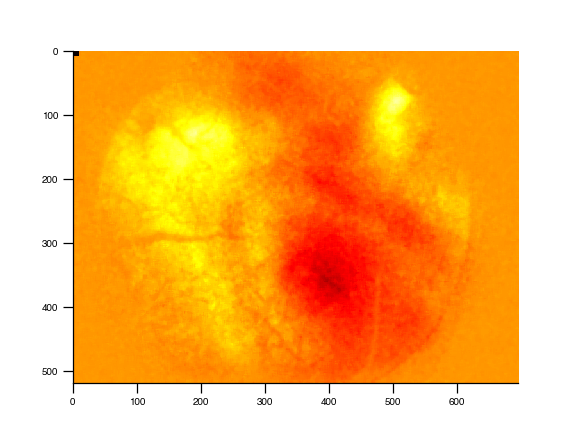

{'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0aa403f3c8>,
 'im': <matplotlib.image.AxesImage at 0x7f0a4e139ef0>,
 'update': <function wfield.plotutils.nb_play_movie.<locals>.updateImage(change)>}

In [5]:
%matplotlib notebook
nb_play_movie(stimavg[1],cmap = 'hot')

In [6]:
# Annotate the resolution from the window size
#resmanual = manual_sample_window_scale(oriim)
resmanual = {'points': [[248, 38], [20, 157], [58, 545], [456, 561], [433, 566]],
             'circlepar': (260.95671958612024, 331.68724389590943, 295.5730667704578),
             'resolution': 0.008460236886632826}
refpar = {'translation': np.array([0.72039817, 0.31865529]),
 'rotation': 44,
 'scale': 1.2412353562944267}

In [31]:
refpar

{'translation': array([0.72039817, 0.31865529]),
 'rotation': 44,
 'scale': 1.2412353562944267}

Manual annotation of the window:
	 circlepar: (260.95671958612024, 331.68724389590943, 295.5730667704578)
	 resolution: 0.008460236886632826
	 points: [[248, 38], [20, 157], [58, 545], [456, 561], [433, 566]]


<IPython.core.display.Javascript object>


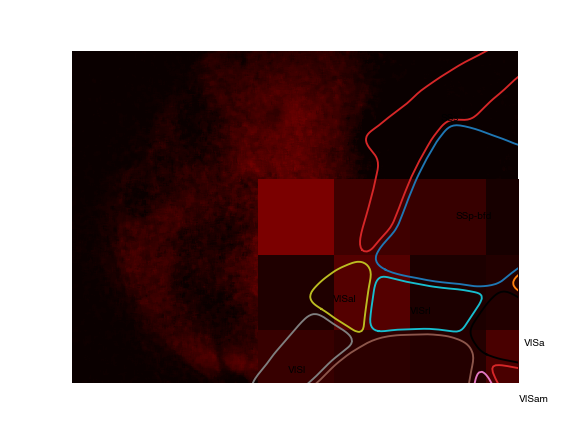

In [13]:
# Now the manual annotations to the allen
print('Manual annotation of the window:')
print('\n'.join(['\t {0}: {1}'.format(k,resmanual[k]) 
                 for k in ['circlepar','resolution','points']]))
%matplotlib notebook
fig = plt.figure()
extent = imshow_window(oriim[:,::-1],resmanual,plot = False)
for i,s in enumerate([stimavg[1]]):
    fig.add_subplot(1,1,i+1)
    nb_play_movie(s[:,:,::-1],clim = [0,1000],interval = 100,extent = extent,cmap = 'hot')
    manual_overlay_allen_areas(refregions,refpar)
    plt.axis(extent)
    plt.axis('off')

In [6]:
refpar

{'translation': array([-0.73346665, -1.6759499 ]),
 'rotation': 44,
 'scale': 1.2412353562944267}

<IPython.core.display.Javascript object>


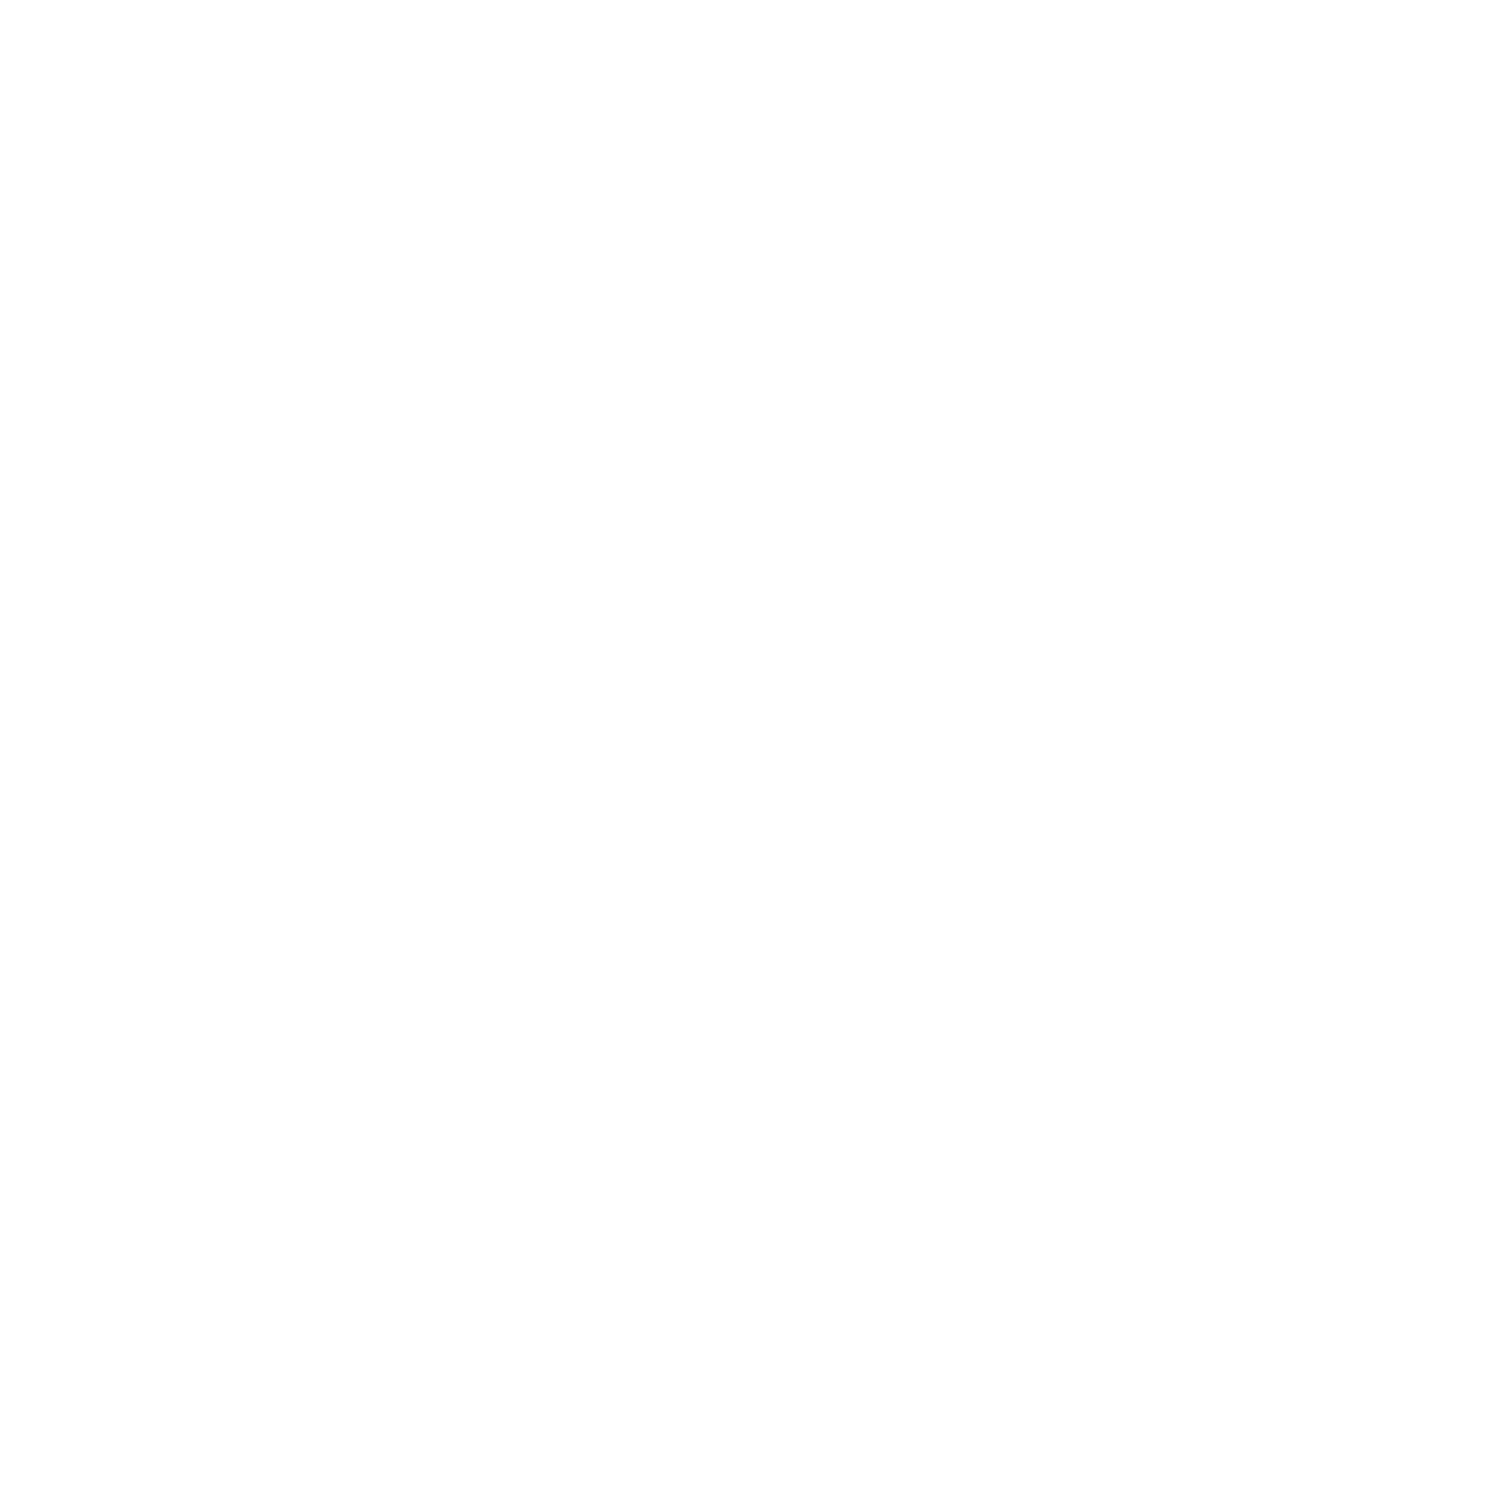

/opt/conda/envs/tacnav/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


NameError: name 'stimavg' is not defined

In [6]:
plt.close('all')
from djexpcode import *
fig = plt.figure(figsize = [15,15])


# image and reference
extent = imshow_window(oriim,resmanual,False)
plt.subplot(2,2,1)
mask = make_circle_mask(resmanual['circlepar'],oriim)
tmp = im_adapt_hist(oriim[::,::-1].astype(np.uint16))
tmp[mask == 0] = 0.1
plt.imshow(tmp,extent = extent,cmap = 'gray',alpha = 1)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color='r',alpha = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'w',lw = 2);
plt.axis('off')
# Visual
x = stimavg[0].copy()
for i,f in enumerate(x):
    x[i] = im_gaussian(f,0.1)

x0 = x.std(axis = 0)
x1,x1p = fft_movie(stimavg[0])
x1[mask == 0] = np.nan 
x1[x1p<0.35] = np.nan
x1p[mask == 0] = np.nan 
plt.subplot(2,2,2)
cmap = hsl_cmap(50)
im = plt.imshow(x1[:,::-1],extent = extent,cmap = cmap)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')

fig.add_subplot(2,2,3)
plt.imshow(x1p[:,::-1],extent = extent, clim = [0.35,2.5],cmap = 'hot')
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')

cax  = fig.add_subplot(2,2,4,projection = 'polar')
X,Y = np.meshgrid(np.linspace(np.nanmin(x1),np.nanmax(x1),200)+np.deg2rad(50), np.linspace(0,19,200))
xx = np.stack([np.ones(200)*np.nan]*150+[np.linspace(np.nanmin(x1),np.nanmax(x1),200)]*50)
plt.pcolormesh(X,Y,xx,cmap = cmap)
fname = pjoin(pdfsavepath,'reference_circling_patch_{0}.pdf'.format(expname))
# plt.savefig(fname);
# plt.savefig(fname.replace('.pdf','.svg'));
# fname = pjoin(pngsavepath,'reference_circling_patch_{0}.png'.format(expname))
# plt.savefig(fname);

# plt.savefig('/home/joao/Desktop/window_JC092_visual.pdf')

<IPython.core.display.Javascript object>


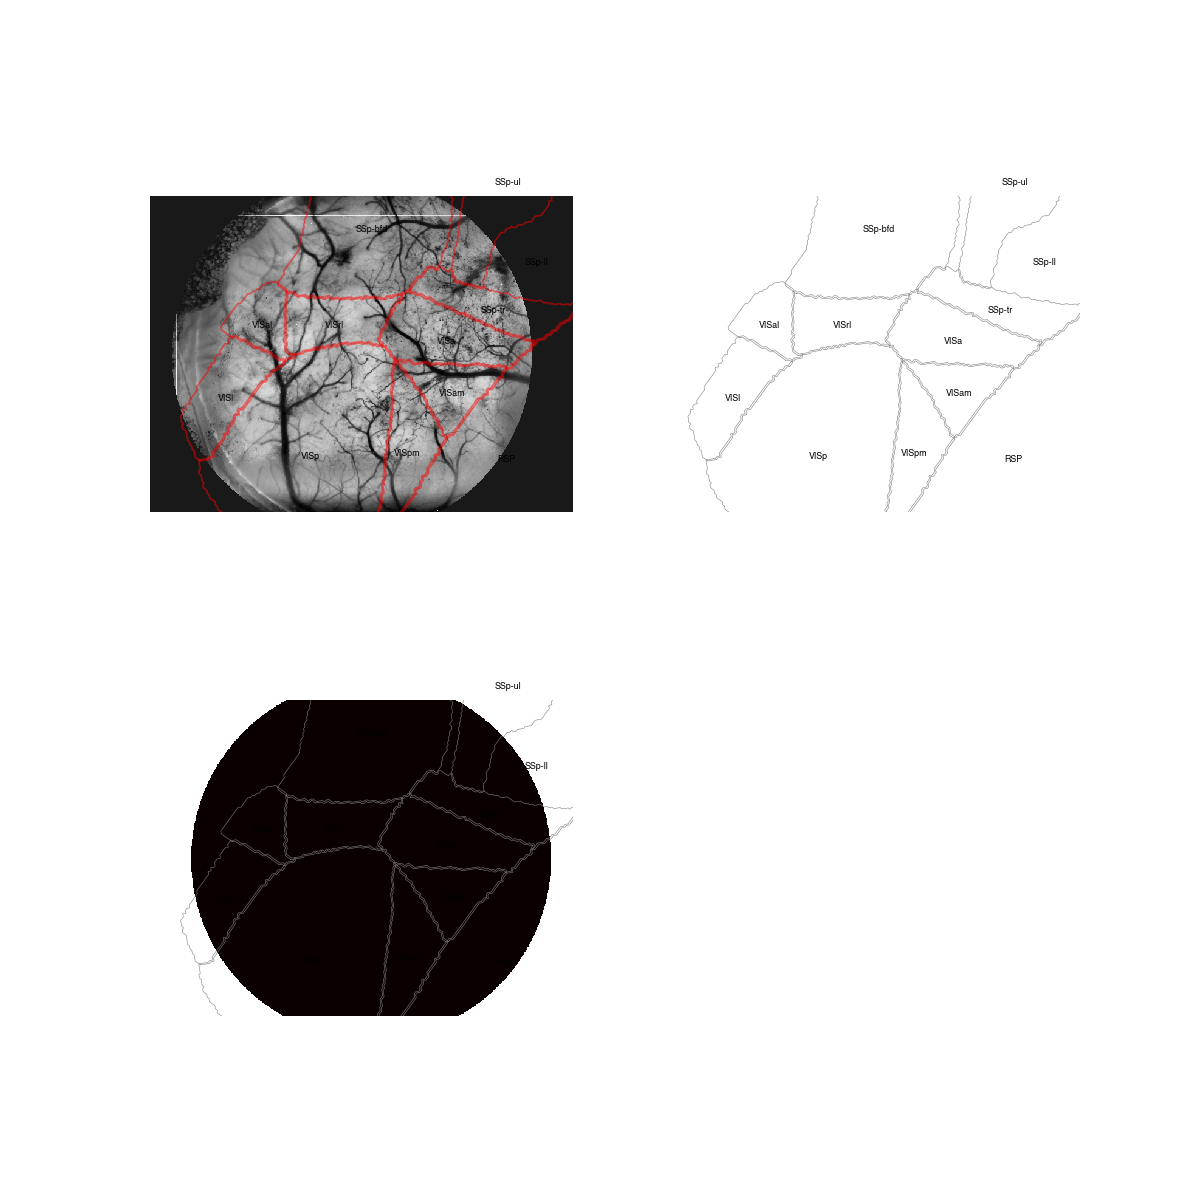

/opt/conda/envs/tacnav/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/opt/conda/envs/tacnav/lib/python3.6/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.

In [11]:
plt.close('all')
fig = plt.figure(figsize = [15,15])
# image and reference
plt.subplot(2,2,1)
mask = make_circle_mask(resmanual['circlepar'],oriim)
tmp = im_adapt_hist(oriim[::,::-1].astype(np.uint16))
tmp[mask == 0] = 0.1
plt.imshow(tmp,extent = extent,cmap = 'gray',alpha = 1)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color='r',alpha = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'w',lw = 2);
plt.axis('off')
# Visual
x = stimavg[1].copy()
for i,f in enumerate(x):
    x[i] = im_gaussian(f,0.1)

x0 = x.std(axis = 0)
x1 = np.argmax(x,axis = 0).astype(np.float32)
x1[x0<0.1] = np.nan
xfft = np.fft.fft(x,axis = 0) 
x1p = np.abs(xfft[1])/np.sqrt(len(xfft))
x1 = x1p.copy() #np.angle(xfft[1])
x1[mask == 0] = np.nan 
x1[x1p<0.5] = np.nan
x1p[mask == 0] = np.nan 
plt.subplot(2,2,2)
im = plt.imshow(x1[:,::-1],vmax = 2.8,extent = extent,cmap = 'gray_r')
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')

fig.add_subplot(2,2,3)
plt.imshow(x1p[:,::-1],extent = extent, clim = [0.35,2.5],cmap = 'hot')
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
fname = pjoin(pdfsavepath,'reference_puff_{0}.pdf'.format(expname))
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'reference_puff_{0}.png'.format(expname))
plt.savefig(fname);
# plt.savefig('/home/joao/Desktop/window_JC092_puff.pdf')

### Lap triggered maps
For experiment 190124_JC092_1P_JC run00_closedLoopActuator; laps 10-20 are with light and laps 25-35 are in darkness.


In [58]:
from wfield import *
from wfield.scripts_pyvstim import get_lap_triggered,get_logs_and_cams

fname = str('/mnt/nerfhf01/boninwip/data/1photon/raw/190212_JC079_1P_JC/run00_closedLoopActuator')

# Annotate the resolution from the window size
# resmanual = manual_sample_window_scale(oriim)

from wfield.allen import load_refregions
refregions = load_refregions()

# Compute the lap frames
expname,logfile,plog,camtime,camdata = get_logs_and_cams(fname)
baseline = np.mean(camdata[0:1000:1,:,:],axis = 0)
lapFrames,baseline = get_lap_triggered(expname,plog,camtime,camdata,
                                       lapbin = 1.,lapidx = (4,16),baseline = baseline)
lapFrames_dark,baseline = get_lap_triggered(expname,plog,camtime,camdata,
                                       lapbin = 1.,lapidx = (20,32),baseline = baseline)

fname = str('/mnt/nerfhf01/boninwip/data/1photon/raw/190212_JC079_1P_JC/run01_closedLoopActuator-nowhiskers')
expname,logfile,plog,camtime,camdata = get_logs_and_cams(fname)
baseline = np.mean(camdata[0:1000:1,:,:],axis = 0)
lapFrames_nowhiskers,baseline = get_lap_triggered(expname,plog,camtime,camdata,
                                       lapbin = 1.,baseline = baseline)

# # median filtering
flapFrames = medfilt2d(lapFrames,11)
flapFrames_dark = medfilt2d(lapFrames_dark,11)
flapFrames_nowhiskers = medfilt2d(lapFrames_nowhiskers,11)


/mnt/nerfhf01/boninwip/data/presentation/190212_JC079_1P_JC/run00_closedLoopActuator.log
The number of screen pulses 32 does not match the visual stimulation not found:0 log.
Computing the lap maps for 12 laps.


100%|██████████| 147/147 [00:03<00:00, 36.77it/s]


Computing the lap maps for 12 laps.


100%|██████████| 147/147 [00:03<00:00, 40.89it/s]


/mnt/nerfhf01/boninwip/data/presentation/190212_JC079_1P_JC/run01_closedLoopActuator-nowhiskers.log
The number of screen pulses 28 does not match the visual stimulation not found:0 log.
Computing the lap maps for 12 laps.


100%|██████████| 149/149 [00:07<00:00, 20.99it/s]


<IPython.core.display.Javascript object>


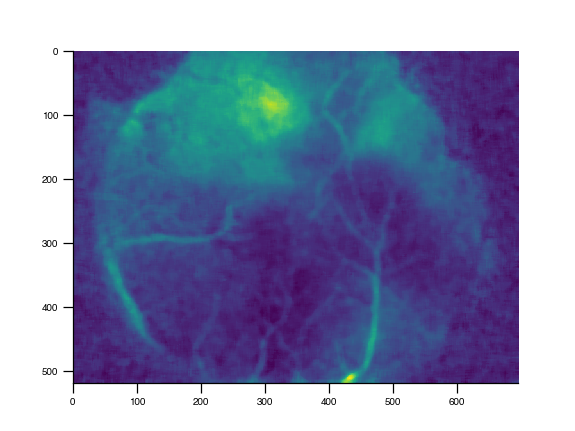

{'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f09ae3dbba8>,
 'im': <matplotlib.image.AxesImage at 0x7f0a215aa160>,
 'update': <function wfield.plotutils.nb_play_movie.<locals>.updateImage(change)>}

In [64]:
plt.figure()
nb_play_movie((flapFrames-np.nanmean(flapFrames))/np.std(flapFrames))

In [65]:
mlight,ph = fft_movie((flapFrames-np.nanmean(flapFrames))/np.std(flapFrames),component = 3)
mdark,ph = fft_movie((flapFrames_dark-np.nanmean(flapFrames_dark))/np.std(flapFrames_dark),component = 3)
mnow,ph = fft_movie((flapFrames_nowhiskers-np.nanmean(flapFrames_nowhiskers))/np.std(flapFrames_nowhiskers),component = 3)


<IPython.core.display.Javascript object>


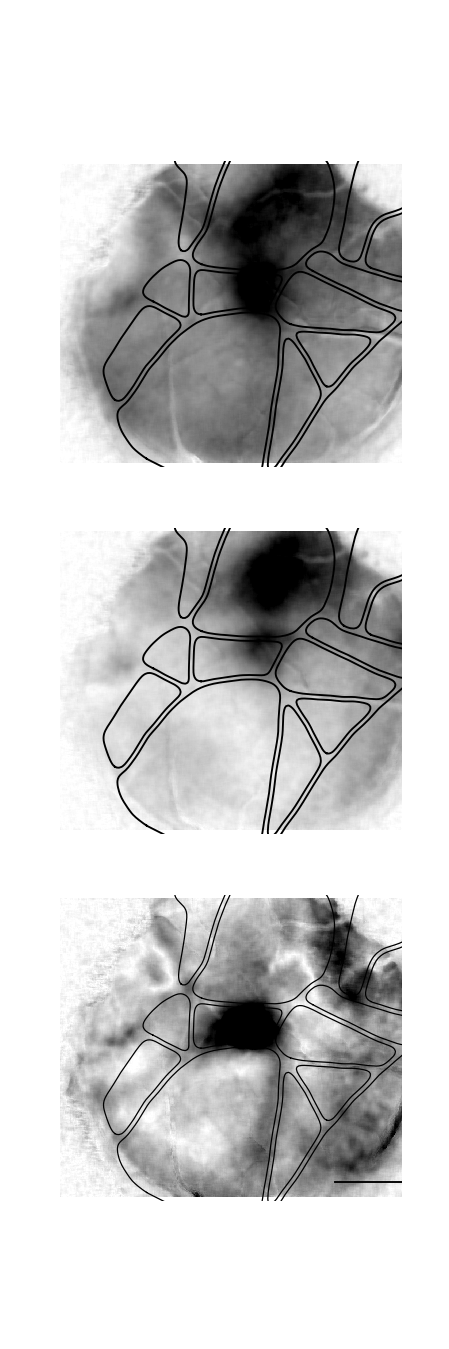

In [110]:
fitpars = {"reference_structure": "VISp",
           "rotation": 38,
        "scale": 1.14,
        "translation": [
            0.03319168666625982,
            -0.9495203235543235
        ]}
resmanual =  {"circlepar": [
    69.58812224660585,
    -28.982007003255603,
    291.0],
              "resolution": 0.00859106529209622,
              "windowsize": 5}
nrefregions = adjust_allen_areas(refregions,**fitpars)
fig = plt.figure(figsize=[5,15])
fig.add_subplot(3,1,1)
extent = imshow_window(mlight[:,::-1],resmanual,vmin = np.percentile(mlight,2),vmax = np.percentile(mlight,98),cmap = 'gray_r')
plot_allen_areas(nrefregions,plotnames=False,color='k')
plt.axis([-2.74,2.36,2.28,-2.28])
plt.axis('off')
fig.add_subplot(3,1,2)
extent = imshow_window(mdark[:,::-1],resmanual,vmin = np.percentile(mdark,2),vmax = np.percentile(mdark,98),cmap = 'gray_r')
plot_allen_areas(nrefregions,plotnames=False,color='k')
plt.axis([-2.74,2.36,2.28,-2.28])
plt.axis('off')

fig.add_subplot(3,1,3)
extent = imshow_window(mnow[:,::-1],resmanual,vmin = np.percentile(mnow,2),vmax = np.percentile(mnow,98),cmap = 'gray_r')
plot_allen_areas(nrefregions,plotnames=False,color='k',lw = 1)
plt.axis([-2.74,2.36,2.28,-2.28])
plt.axis('off')
plt.plot([1.36,2.36],[2,2])
plt.savefig('/home/joao/documents_share/JC079_whisker_cut_wfield.pdf')
# plt.imshow(np.concatenate([mlight,mdark,mnow],axis = 1),cmap = 'gray_r')

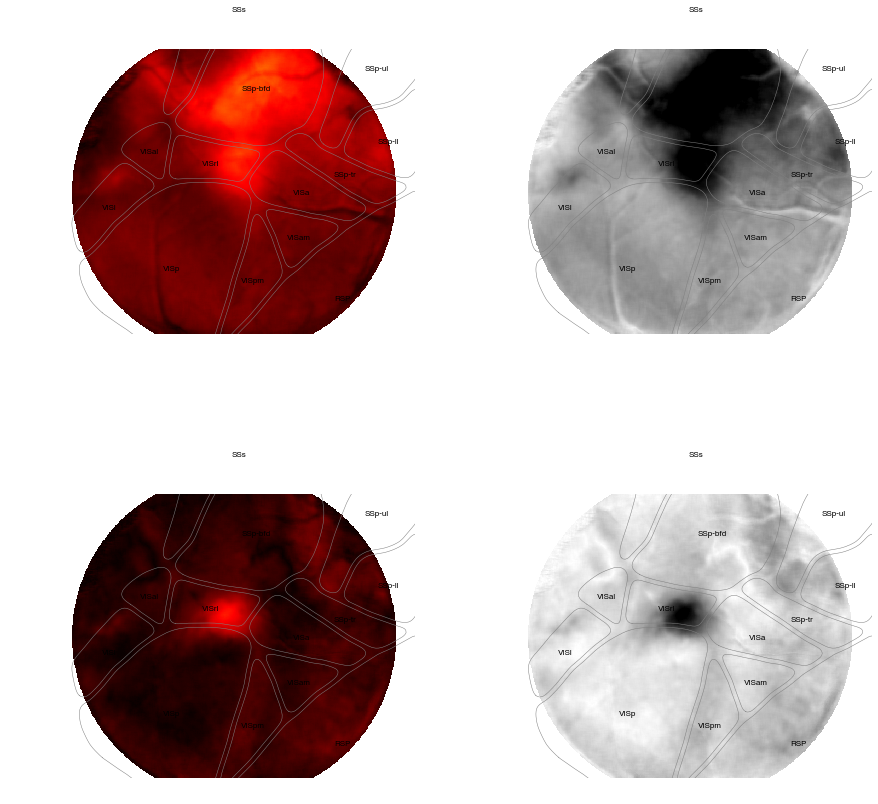

In [19]:
%matplotlib inline

from os.path import join as pjoin
fig = plt.figure(figsize = [15,15])
# image and reference
plt.subplot(2,2,1)
mask = make_circle_mask(resmanual['circlepar'],flapFrames[0])
refpar = {"reference_structure": "VISp",
        "rotation": 46,
        "scale": 1.17,
        "translation": [
            -0.4111260084786834,
            -1.3625052227356464
        ]}
x = flapFrames
x1p,x1 = fft_movie(x,3)
x1p[mask == 0] = np.nan 
x1ps = x.std(axis = 0)
x1ps[mask == 0] = np.nan 

plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.04,cmap = 'hot',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.015,cmap = 'gray_r',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')

plt.subplot(2,2,3)
x = flapFrames_nowhiskers
x1p,x1 = fft_movie(x,3)
x1p[mask == 0] = np.nan 

x1ps = x.std(axis = 0)
x1ps[mask == 0] = np.nan 

plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.04,cmap = 'hot',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.015,cmap = 'gray_r',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
fname = pjoin(pdfsavepath,'reference_position_{0}.pdf'.format(expname))
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'reference_position_{0}.png'.format(expname))
plt.savefig(fname);

Text(0.5, 1.0, 'Widefield cue map')

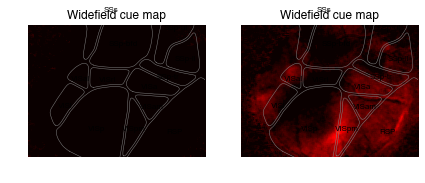

In [18]:
extent = imshow_window(lapFrames[0],resmanual,plot = False)
%matplotlib inline

fig = plt.figure(figsize = [7,3.5])
fig.add_subplot(1,2,1)
extent2 = [extent[1],extent[0],extent[2],extent[3]]
nb_play_movie(flapFrames,clim = [0,0.1],
              extent = extent2,cmap = 'hot',alpha = 1)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
set_cursor_info_image_coords()
plt.axis('off')
plt.title('Widefield cue map')
fig.add_subplot(1,2,2)
extent2 = [extent[1],extent[0],extent[2],extent[3]]
nb_play_movie(flapFrames_nowhiskers,clim = [0,0.1],
              extent = extent2,cmap = 'hot',alpha = 1)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
set_cursor_info_image_coords()
plt.axis('off')
plt.title('Widefield cue map')

<IPython.core.display.Javascript object>


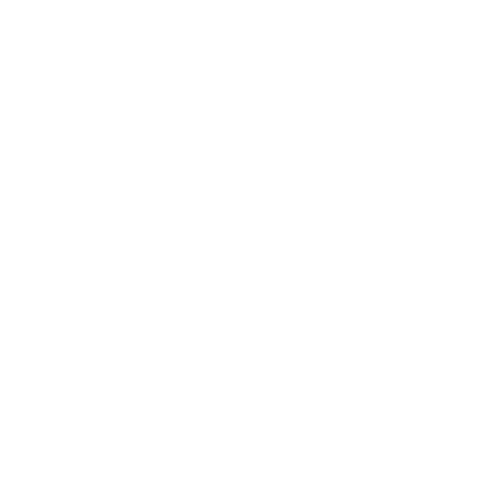

NameError: name 'flapFrames_dark' is not defined

<IPython.core.display.Javascript object>


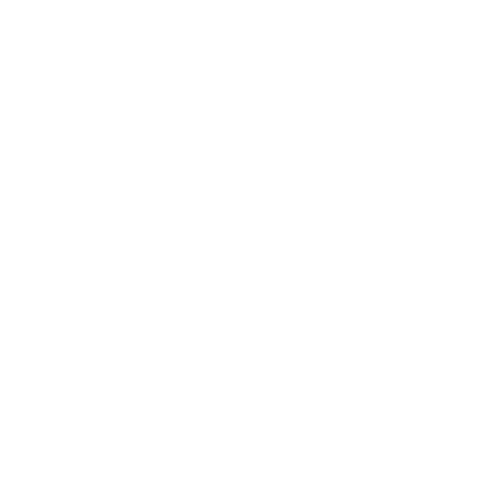

In [15]:
coords = [[234,104],[226,216],[275,208],[322,360],[332,77]]
from djexpcode import *
fig = plt.figure(figsize = [7,7])
o = 0.15
fig.add_axes([0.6,0.2,0.4,0.7])
for i,(y,x) in enumerate(coords[:]):
    plt.plot(flapFrames[:,x-50:x+10,y-10:y+10].mean(axis = 2).mean(axis = 1) + i*o,color = 'k')
    plt.plot(flapFrames_dark[:,x-10:x+10,y-10:y+10].mean(axis = 2).mean(axis = 1) + i*o,color = 'r')
    plt.text(0,i*o,str(i+1))
plt.plot([0,25],[0,0],'k',lw = 1.5)    
mask = make_circle_mask(resmanual['circlepar'],flapFrames[0])
x = flapFrames[20:85]
x1p,x1 = fft_movie(x,1)
x1p[mask == 0] = np.nan 
x1ps = x.std(axis = 0)
x1ps[mask == 0] = np.nan

fig.add_axes([0.1,0.1,0.3,0.8])
y,x = coords[0]
x1p[x-50:x+50,y-50:y+50] = 200
plt.imshow(x1p[:,:],vmin = 0,vmax = 20,cmap = 'gray_r',extent=extent2)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
yy = np.abs(np.diff([extent2[0],extent2[1]]))
xx = np.abs(np.diff([extent2[2],extent2[3]]))
array = x1
for i,(y,x) in enumerate(coords[:]):
    x = float(x)
    y = float(y)
    x -= array.shape[0]/2
    y -= array.shape[1]/2
    x /= array.shape[0]
    y /= array.shape[1]
    y *= -1
    plt.text((yy*y),(xx*x),str(i+1),color = 'r',va = 'center',ha = 'center')
    print(x*xx,y*yy)


<IPython.core.display.Javascript object>


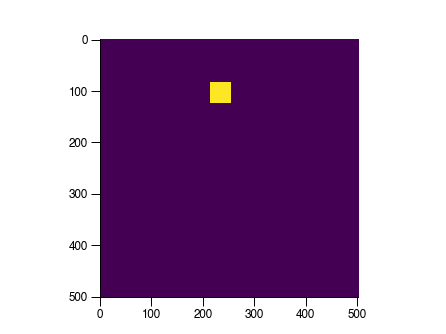

(149, 1600)


<IPython.core.display.Javascript object>


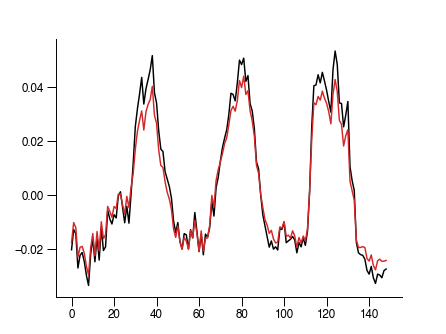

(149, 10000)


<IPython.core.display.Javascript object>


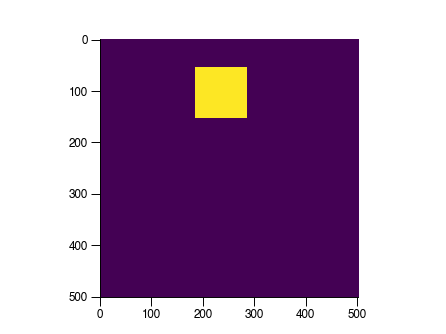

In [63]:
mask = np.zeros_like(x1p)
y,x = coords[0]
mask[x-20:x+20,y-20:y+20] = 1
a = np.where(mask == 1)
plt.figure()
plt.imshow(mask)
tmp = flapFrames[:,a[0],a[1]]
print(tmp.shape)
plt.figure()
plt.plot(tmp.mean(axis = 1))
mask = np.zeros_like(x1p)
y,x = coords[0]
mask[x-50:x+50,y-50:y+50] = 1
a = np.where(mask == 1)
tmp = flapFrames[:,a[0],a[1]]
print(tmp.shape)
plt.plot(tmp.mean(axis = 1))
plt.figure()
plt.imshow(mask)


In [54]:
20*20

400

In [32]:
mask[np.newaxis,:,:].shape

(1, 501, 502)

In [25]:
xx*x

array([-0.45172812])

In [67]:
np.diff([extent2[2],extent2[3]])

array([-5.26315789])

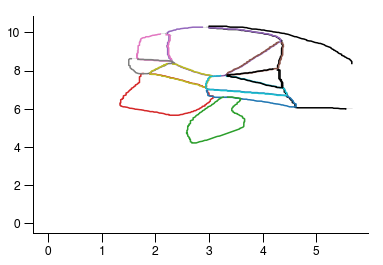

In [101]:
r = refregions[-1]['c']

from scipy.interpolate import interp2d
from scipy.signal import savgol_filter,medfilt
nrefregions = [r for r in refregions]
for ii,r in enumerate(refregions):
    r = r['c']
    i = np.arange(len(r[:,0]))
    x = interp1d(i[::2],r[::2,1],kind = 'slinear',fill_value = 'extrapolate',bounds_error=False)
    y = interp1d(i[::2],r[::2,0],kind = 'slinear',fill_value = 'extrapolate',bounds_error=False)
    #plt.figure()
    #x = savgol_filter(r[:,1],5,3)
    #y = savgol_filter(r[:,0],5,3)
    plt.plot(r[:,1],r[:,0],'k',lw = 0.1)
    plt.plot(medfilt(x(i),11),medfilt(y(i),11))
    #plt.plot(y,x)
    nrefregions[ii]['c'] = np.vstack([medfilt(y(i),11),medfilt(x(i),11)]).T

In [100]:
refregions = load_refregions()

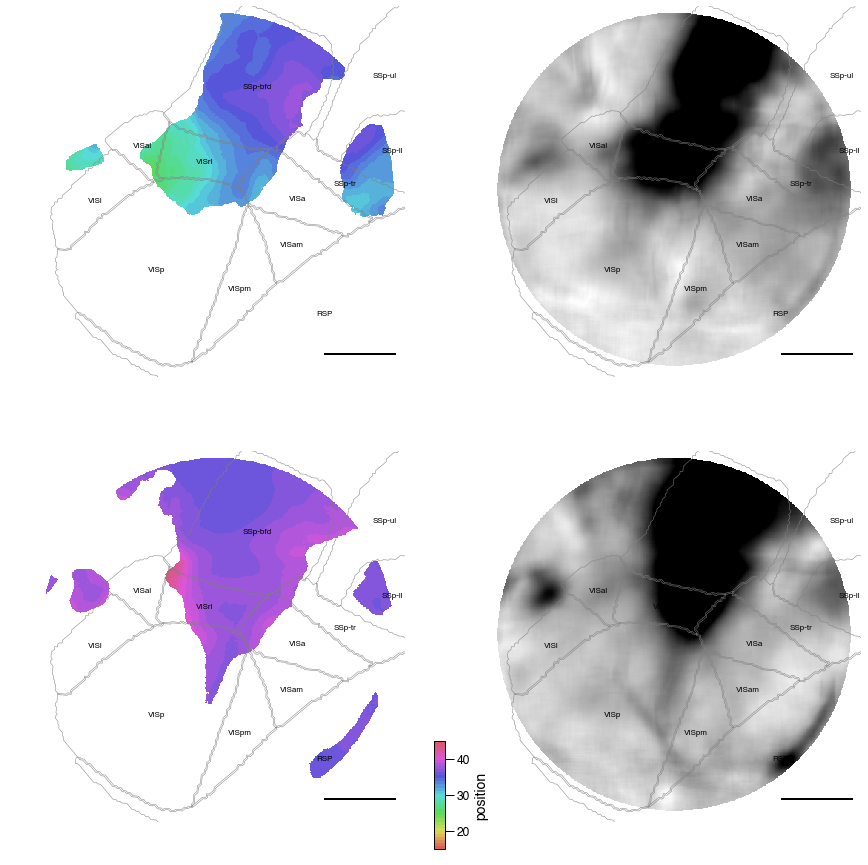

In [68]:
%matplotlib inline

from os.path import join as pjoin
fig = plt.figure(figsize = [15,15])
# image and reference
plt.subplot(2,2,1)
mask = make_circle_mask(resmanual['circlepar'],flapFrames[0])

x = flapFrames[10:45]
x1p,x1 = fft_movie(x,1)
x1ps = x.std(axis = 0)
x1ps[mask == 0] = np.nan 
x1[x1p<0.01] = np.nan
x1[mask == 0] = np.nan
x1 /= 2*np.pi
x1 *= 35
x1 += 10
x1p[mask == 0] = np.nan 

a = plt.imshow(x1[:,::-1],cmap = hsl_cmap(35),clim = [15,45],extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
cax = fig.add_axes([0.5,0.1,0.01,0.1])
plt.colorbar(ax = a,cax = cax,label = 'position')
plt.subplot(2,2,2)
plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.02,cmap = 'gray_r',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')

plt.subplot(2,2,3)
x = flapFrames_dark[10:45]
x1p,x1 = fft_movie(x,1)

x1ps = x.std(axis = 0)
x1ps[mask == 0] = np.nan 
x1[x1p<0.01] = np.nan
x1[mask == 0] = np.nan
x1 /= 2*np.pi
x1 *= 35
x1 += 10
x1p[mask == 0] = np.nan 

plt.imshow(x1[:,::-1],cmap = hsl_cmap(35),clim = [15,45],extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(x1p[:,::-1],vmin = 0,vmax = 0.02,cmap = 'gray_r',extent=extent)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color=[.5,.5,.5],lw = 0.5);
plt.axis(extent)
plt.plot([1.5,2.5],[2.3,2.3],'k',lw = 2);
plt.axis('off')
fname = pjoin(pdfsavepath,'reference_cue_phase_{0}.pdf'.format(expname))
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'reference_cue_phase{0}.png'.format(expname))
plt.savefig(fname);

### 2p image plane location

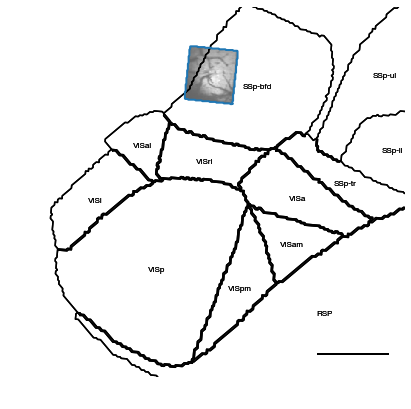

In [170]:
from skimage import img_as_float
plt.figure(figsize = [15,15])
# x = stims[4]
# for i,f in enumerate(x):
#     x[i] = im_gaussian(f)
# x0 = x.std(axis = 0)
# x = stims[5]

# for i,f in enumerate(x):
#     x[i] = im_gaussian(f)
# x1 = x.std(axis = 0)
# x0[x0<0.1] = np.nan
# x1[x1<0.1] = np.nan
# plt.imshow(x0[::,::-1],extent = extent,clim = [0.0,1.],cmap = 'Reds',alpha = 1)
# plt.imshow(x1[::,::-1],extent = extent,clim = [0.0,1.],cmap = 'Greens',alpha = 1)
# plt.imshow(im_adapt_hist(oriim[::,::-1].astype(np.uint16)),extent = extent,cmap = 'gray',alpha = 0.6)
plt.subplot(2,2,1)
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color='k')
fitim = imread('/export/data/mouselab/data/2photon/raw/190126_JC092_2P_S1_JC/ref000_plane001_zero_reference_mag_1.7.tif')
fitim = fitim.squeeze()
fitim = estimate_sbx_lost_lines(fitim)
plot_allen_areas(res,color='k')

fitpar_guess = {'refh': 501,
 'refw': 502,
 'rotation': 6,
 'scale': 0.10228085212245784,
 'ratio': 1.2443285533709707,
 'origin': [54.04900165646944, 226.46029662516605]}
res = adjust_to_reference(fitim,**fitpar_guess)
from skimage.measure import find_contours
xys = find_contours(np.isnan(res[:,::-1]),0.5)[0].astype(np.float)
h,w = res.shape
xys[:,0] -= h/2.
xys[:,1] -= w/2.
xys *= resmanual['resolution']
plt.imshow(res[:,::-1],extent = extent,cmap = 'gray',alpha = 0.6)
plt.plot(xys[:,1],xys[:,0],color=colors[2],lw = 2)
plt.axis(extent)
plt.plot([1.4,2.4],[2.3,2.3],'k',lw = 2)
plt.axis('off')
fname = pjoin(pdfsavepath,'reference_2p_{0}.pdf'.format('190126_JC092_2P_S1_JC'))
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'reference_2p_{0}.png'.format('190126_JC092_2P_S1_JC'))
plt.savefig(fname);

In [178]:
#Selection

from matplotlib.widgets import RectangleSelector
def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)
toggle_selector.RS = RectangleSelector(pstack['ax'], lambda x,y: (x,y),
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)

20

Traceback (most recent call last):
  File "/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/widgets.py", line 1597, in release
    self._release(event)
  File "/opt/conda/envs/tacnav/lib/python3.6/site-packages/matplotlib/widgets.py", line 2194, in _release
    self.onselect(self.eventpress, self.eventrelease)
  File "<ipython-input-177-8d1ccd2bff13>", line 19, in <lambda>
    toggle_selector.RS = RectangleSelector(pstack['ax'], lambda x,y: xy,
NameError: name 'xy' is not defined


(0.5493782844207304, -1.4717146091034046)

In [45]:

mask = make_circle_mask(resmanual['circlepar'],oriim)
x = stims[4]
for i,f in enumerate(x):
    x[i] = im_gaussian(f,0.1)
x0 = x.std(axis = 0)
x1 = np.argmax(x,axis = 0).astype(np.float32)
x1[x0<0.07] = np.nan
x1[mask == 0] = np.nan 
plt.close('all')
plt.imshow(x1[:,::-1],extent = extent,cmap = 'Spectral')
res = adjust_allen_areas(refregions,**refpar)
plot_allen_areas(res,color='k');


In [91]:
plt.figure()
plt.imshow(x1,clim = [0,0.2])

In [86]:
plt.figure()
plt.imshow(im_adapt_hist(oriim[:,::-1].astype(np.uint16),0.05),extent=extent,cmap = 'gray')
h,w = oriim.shape
circlepar = np.array(resmanual['circlepar'])

# circlepar[0] = circlepar[0] - h/2
# circlepar[1] = circlepar[1] - w/2

plt.plot(xy[:,1],xy[:,0])

plt.figure()
tmp = oriim.copy()
tmp[r_mask == 0] = 0
plt.imshow(tmp,extent=extent)

In [30]:

# # Create an empty image to store the masked array
# 

# # Create a contour image by using the contour coordinates rounded to their nearest integer value
# r_mask[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

# # Fill in the hole created by the contour boundary
# r_mask = ndimage.binary_fill_holes(r_mask)


In [147]:
# smothe and fft
from tqdm import tqdm


fftmaps=[]
smoothed =[]
cropcorner = 0
for s in stims[:4]:
    idx = np.where(np.diff(s[:,0,0])!=0)[0] + 1
    smoothed.append([])
    for iframe,ii in tqdm(enumerate(np.arange(idx[0],idx[1]))):
        smoothed[-1].append(im_gaussian(s[ii][cropcorner:,cropcorner:],15))
    smoothed[-1] = np.stack(smoothed[-1])
    fftmaps.append(np.fft.fft(smoothed[-1],axis = 0))

396it [00:15, 24.86it/s]
396it [00:16, 24.60it/s]
396it [00:16, 24.61it/s]
396it [00:16, 24.70it/s]


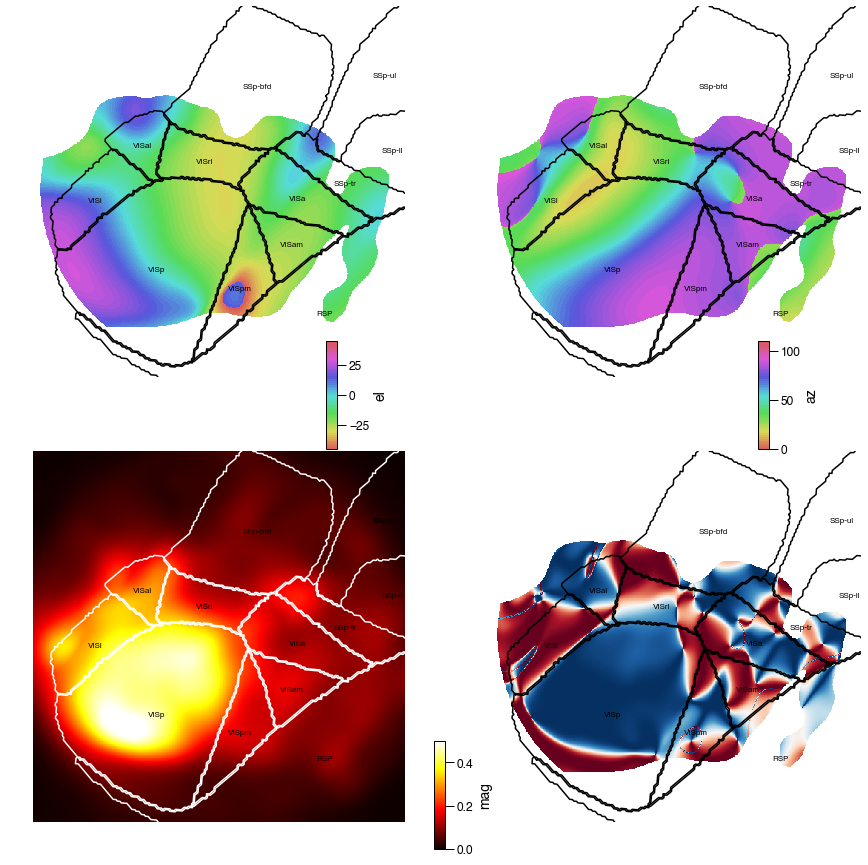

In [169]:
%matplotlib inline
# Phase maps
phasemaps = []
powermaps = []
visualangles = [[0,60+60],
                [60+60,-60+60],
                [60+60,-60+60]]
import seaborn as sns
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("hls", 60))
plotintermediate = False
for i,mp in enumerate(fftmaps):
    #phasemaps.append(-1*np.angle(mp[1]) % (2*np.pi))
    mult = -1
    if i >1:
        mult = 1
    phasemaps.append(mult*np.angle(mp[1]) % (2*np.pi))
    phasemaps[-1] /= 2*np.pi
    powermaps.append((np.abs(mp[1])*2)/len(mp))
#     plt.imshow(-1*np.angle(mp[1]),cmap='RdBu')
    #tmp *= np.diff(visualangles[i])[0]
    #tmp += visualangles[i][0]

    if plotintermediate:
        fig = plt.figure(figsize = (15,15))
        fig.add_subplot(2,2,i+1)
    #     plt.imshow(powermaps[-1],cmap='hot')
        powermap = powermaps[-1]
    #     tmp = (phasemaps[-1].copy()+2*np.pi)/2/np.pi 
        tmp = phasemaps[-1].copy()
        tmp[mask == 0] = np.nan
        tmp[powermap < 0.1] = np.nan
        plt.imshow(tmp[:,::-1],cmap=cmap,extent=extent)
        plot_allen_areas(nrefregions);
        plt.axis(extent)
        plt.colorbar()

elmap = np.nanmean(np.stack([phasemaps[0],phasemaps[2]]),axis = 0)*120. - 60
elpower = np.nanmean(np.stack([powermaps[0],powermaps[2]]),axis = 0)
azmap = np.nanmean(np.stack([phasemaps[1],phasemaps[3]]),axis = 0)* 120. -10
azpower = np.nanmean(np.stack([powermaps[1],powermaps[3]]),axis = 0)
power = np.nanmean(np.stack(powermaps),axis = 0)
fig = plt.figure(figsize = [15,15])
fig.add_subplot(2,2,1)
x = elmap.copy()
x[mask == 0] = np.nan
x[power < 0.1] = np.nan
a = plt.imshow(x[:,::-1],
           cmap=cmap,
           extent=extent,
           clim = [-45,45])
plot_allen_areas(nrefregions,color='k')
plt.axis(extent)
plt.axis('off')
cax = fig.add_axes([0.4,0.47,0.01,0.1])
plt.colorbar(ax = a,cax = cax,label = 'el')

fig.add_subplot(2,2,2)
x = azmap.copy() 
x[mask == 0] = np.nan
x[power < 0.1] = np.nan
a = plt.imshow(x[:,::-1],
           cmap=cmap,
           extent=extent,
           clim = [0,100])
plot_allen_areas(nrefregions,color='k')
plt.axis(extent)
plt.axis('off')
cax = fig.add_axes([0.8,0.47,0.01,0.1])
plt.colorbar(ax = a,label = 'az',cax = cax)


fig.add_subplot(2,2,3)
x = power.copy()
a= plt.imshow(x[:,::-1],
           cmap='hot',
           extent=extent,clim = [0,0.5])
plot_allen_areas(nrefregions,color='w')
plt.axis(extent)
plt.axis('off')
cax = fig.add_axes([0.5,0.1,0.01,0.1])
plt.colorbar(ax = a,cax = cax,label = 'mag')


fig.add_subplot(2,2,4)
x = visualSignMap(elmap,azmap)
x[mask == 0] = np.nan
x[power < 0.1] = np.nan

plt.imshow(x[:,::-1],
           cmap='RdBu',
           extent=extent,clim = [-1,1])
plot_allen_areas(nrefregions,color='k')
plt.axis(extent)
#plt.colorbar(label = 'power',shrink = 0.3)
plt.axis('off')
fname = pjoin(pdfsavepath,'reference_bars_noise_{0}.pdf'.format(expname))
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
fname = pjoin(pngsavepath,'reference_bars_noise_{0}.png'.format(expname))
plt.savefig(fname);
# plt.imshow(visualSignMap(phasemaps[0],phasemaps[1])[:,::-1],extent=extent,cmap='jet')
# nrefregions = adjust_allen_areas(refregions,**refpar)
# plot_allen_areas(nrefregions);

In [167]:
fname

'/home/joao/lib/djexpcode-tacnav/referencemaps/reference_bars_noise_190124_JC092_1P_JC.png'